<a href="https://colab.research.google.com/github/cardazuluaga/DLCourse/blob/main/EjClasificacionLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los problemas de clasificación son fundamentales en muchos ámbitos de la ingeniería debido a su capacidad para transformar grandes volúmenes de datos en decisiones prácticas y accionables. Por ejemplo, es posible encontrar aplicación de estos problemas en:
1. Reconocimiento de Patrones: En el desarrollo de aplicaciones que requieren reconocimiento de patrones, como el reconocimiento de voz o de escritura, los modelos de clasificación son esenciales para identificar y categorizar patrones de manera precisa.
2. Diagnóstico de Fallos: En sistemas de mantenimiento predictivo, los algoritmos de clasificación pueden predecir fallos en componentes eléctricos y electrónicos antes de que ocurran. Esto permite la reparación preventiva y evita costosas interrupciones.
3. Detección de Defectos en Infraestructuras: Los modelos de clasificación pueden analizar datos de sensores y sistemas de monitoreo para detectar defectos estructurales en puentes, edificios y otras infraestructuras críticas. Esto permite a los ingenieros tomar medidas correctivas antes de que los problemas se agraven.
4. Clasificación de Suelos: En la construcción, es fundamental clasificar tipos de suelo para determinar su idoneidad para soportar estructuras. Los modelos de clasificación pueden automatizar y mejorar la precisión de esta tarea.
5. Diagnóstico Médico: Los sistemas de clasificación son ampliamente utilizados para diagnosticar enfermedades a partir de imágenes médicas, como radiografías, resonancias magnéticas y tomografías. Estos sistemas pueden ayudar a los médicos a detectar enfermedades en etapas tempranas y con mayor precisión.
6. Monitoreo de Calidad del Aire y Agua: Los sensores ambientales generan datos que pueden ser clasificados para determinar la calidad del aire y el agua. Estos modelos pueden detectar contaminantes y alertar a las autoridades para tomar medidas adecuadas.
7. Clasificación de Residuos: Los sistemas de clasificación pueden automatizar el proceso de reciclaje, identificando y separando materiales reciclables de manera eficiente, lo que contribuye a la sostenibilidad y gestión de residuos.

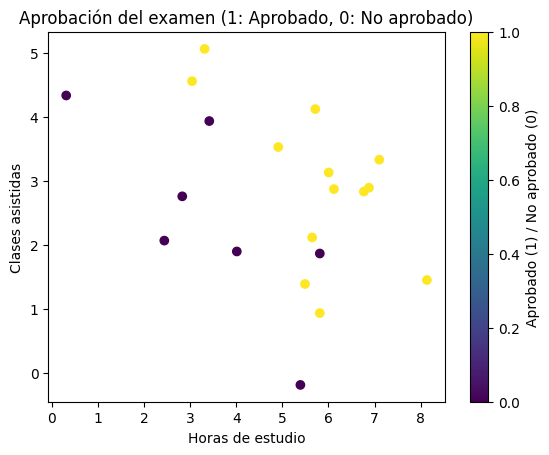

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generación de datos de ejemplo
np.random.seed(20)
n_samples = 20
hours_studied = np.random.normal(5, 2, n_samples)
classes_attended = np.random.normal(3, 1, n_samples)
passed = (hours_studied + classes_attended + np.random.normal(0, 1, n_samples)) > 7
passed = passed.astype(int)

data = pd.DataFrame({
    'hours_studied': hours_studied,
    'classes_attended': classes_attended,
    'passed': passed
})

# Visualización de los datos
plt.scatter(data['hours_studied'], data['classes_attended'], c=data['passed'], cmap='viridis', marker='o')
plt.xlabel('Horas de estudio')
plt.ylabel('Clases asistidas')
plt.title('Aprobación del examen (1: Aprobado, 0: No aprobado)')
plt.colorbar(label='Aprobado (1) / No aprobado (0)')
plt.show()

In [ ]:
# División de los datos en conjuntos de entrenamiento y prueba
X = data[['hours_studied', 'classes_attended']]
y = data['passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



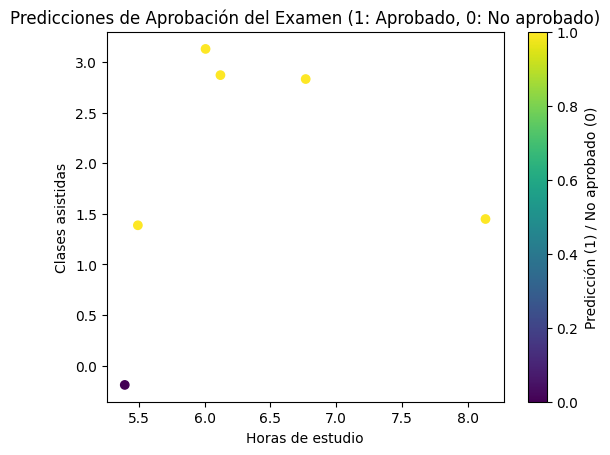

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

In [ ]:
# Visualización de resultados
plt.scatter(X_test['hours_studied'], X_test['classes_attended'], c=y_pred, cmap='viridis', marker='o')
plt.xlabel('Horas de estudio')
plt.ylabel('Clases asistidas')
plt.title('Predicciones de Aprobación del Examen (1: Aprobado, 0: No aprobado)')
plt.colorbar(label='Predicción (1) / No aprobado (0)')
plt.show()